# In Class Notebook, Week 12

You can always access the URL of this notebook: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2023/blob/master/week12/inClass_week12.ipynb 

Or post the URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
buildings = pd.read_csv('https://github.com/UIUC-iSchool-DataViz/is445_data/raw/main/building_inventory.csv')

In [3]:
buildings.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


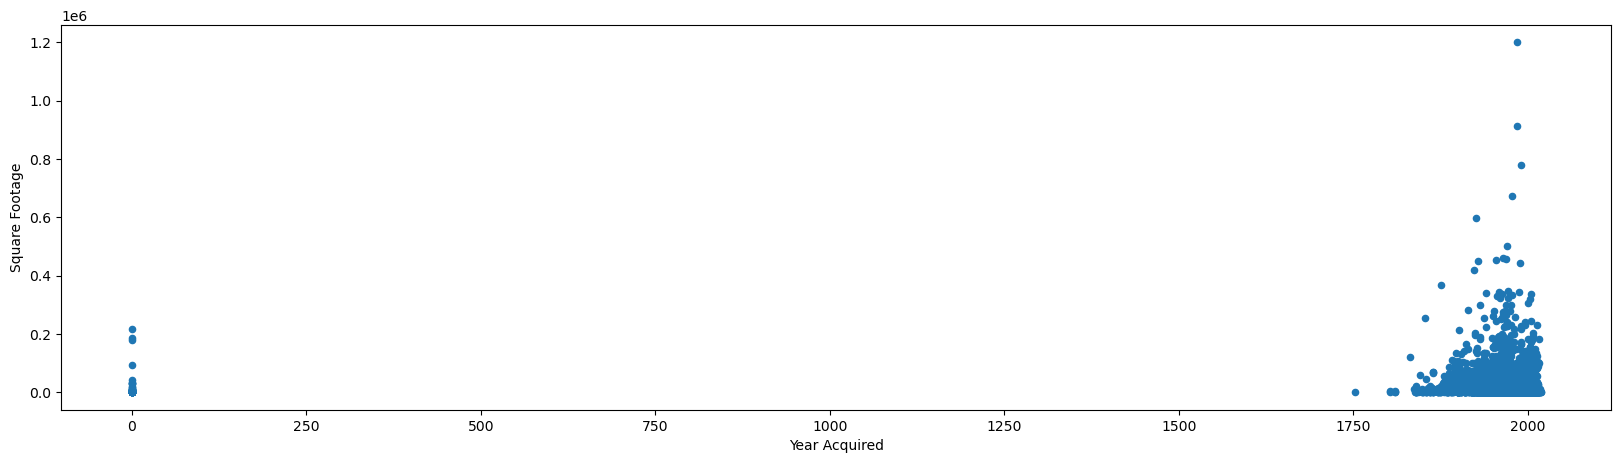

In [4]:
buildings.plot(x='Year Acquired', y='Square Footage', kind='scatter',
              figsize=(20,5))
plt.show()

In [5]:
buildings.loc[buildings['Year Acquired']==0,'Year Acquired'] = np.nan

In [6]:
buildings.loc[buildings['Square Footage']==0,'Year Acquired'] = np.nan

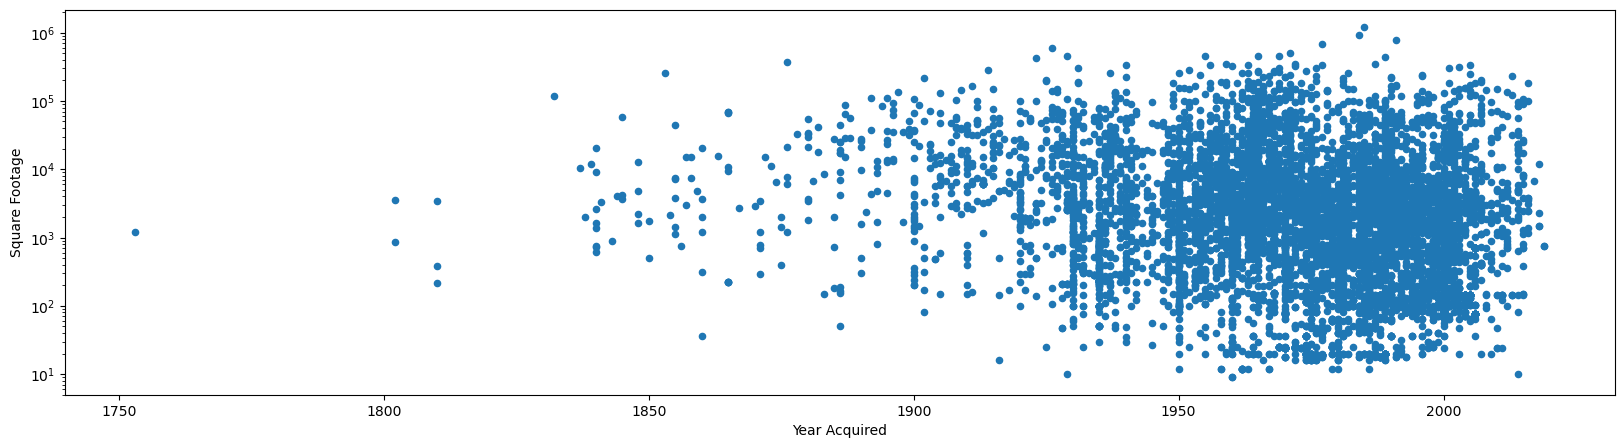

In [7]:
buildings.plot(x='Year Acquired', y='Square Footage', kind='scatter',
              figsize=(20,5), logy=True)
plt.show()

In [8]:
stats = buildings.groupby('Year Acquired')['Square Footage'].describe()

In [9]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


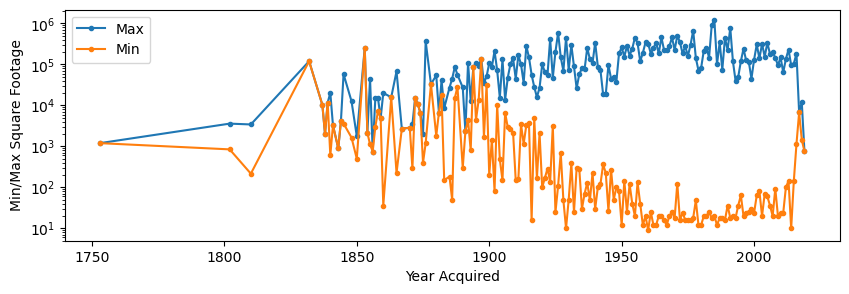

In [10]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(stats['max'], marker='.', label='Max')
ax.plot(stats['min'], marker='.', label='Min')
ax.set_yscale('log')
ax.set_xlabel('Year Acquired')
ax.set_ylabel('Min/Max Square Footage')
ax.legend()
plt.show()

In [11]:
lines = alt.Chart(stats).mark_line().encode(
    alt.X("Year Acquired:O"),
    alt.Y("max:Q")
)
lines

alt.Chart(...)

In [12]:
stats.reset_index()

,Year Acquired,count,mean,std,min,25%,50%,75%,max
0,1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1,1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
2,1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
3,1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
4,1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...,...
166,2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
167,2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
168,2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0
169,2018.0,4.0,4290.000000,5153.644342,1455.0,1455.0,1852.5,4687.50,12000.0


In [13]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:O"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [14]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [15]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


In [16]:
stats.index = pd.to_datetime(stats.index.astype('int'), format='%Y')

In [69]:
#buildings['Year Acquired'] = pd.to_datetime(...)

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,NaN,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971.0,1971,49552,1,1,0,Education,Education,Not provided


In [18]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
).properties(
    width=600
)
lines

alt.Chart(...)

In [19]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    #alt.Y("max:Q")
).properties(
    width=600,
    height=100
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(y='max:Q'),
    lines.mark_line(color='orange').encode(y='min:Q')
)


lines

alt.LayerChart(...)

In [20]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    #alt.Y("max:Q")
).properties(
    width=600,
    height=100
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(
        #y='max:Q'
        alt.Y('max:Q', scale=alt.Scale(type='log'))
    ),
    lines.mark_line(color='orange').encode(
        #y='min:Q'
        alt.Y('min:Q', scale=alt.Scale(type='log'))
    )
).interactive() # "cheap" interactivity


lines

alt.LayerChart(...)

In [21]:
stats_min = stats[['min','max']]

In [22]:
stats_min.head()

,min,max
Year Acquired,,
1753-01-01,1200.0,1200.0
1802-01-01,846.0,3594.0
1810-01-01,216.0,3432.0
1832-01-01,120000.0,120000.0
1837-01-01,10302.0,10302.0


In [23]:
source = stats_min.reset_index().melt('Year Acquired', 
                                      var_name='Statistic',
                                     value_name='stat')

In [24]:
source

,Year Acquired,Statistic,stat
0,1753-01-01,min,1200.0
1,1802-01-01,min,846.0
2,1810-01-01,min,216.0
3,1832-01-01,min,120000.0
4,1837-01-01,min,10302.0
...,...,...,...
337,2015-01-01,max,105000.0
338,2016-01-01,max,184000.0
339,2017-01-01,max,6720.0
340,2018-01-01,max,12000.0


In [25]:
line = alt.Chart(source).mark_line().encode(
    alt.X('Year Acquired:T'),
    alt.Y('stat:Q', scale=alt.Scale(type='log')),
    color='Statistic:N'
)
line

alt.Chart(...)

In [29]:
#nearest_mouse = alt.selection(type='single', nearest=True, on='mouseover', encoding=['x'], empty='None')
nearest_mouse = alt.selection_point(nearest=True, on='mouseover', fields=['Year Acquired'])

line = alt.Chart(source).mark_line().encode(
    alt.X('Year Acquired:T'),
    alt.Y('stat:Q', scale=alt.Scale(type='log')),
    color='Statistic:N'
#).add_selection(
).add_params(
    nearest_mouse
)



text = line.mark_text(align='left').encode(
    text=alt.condition(nearest_mouse,'stat:Q', alt.value(' '))
    # nearest_mouse condtion = True, then column "stat" is the text
    # if not nearest_mouse then empty string (which in practice doesn't happen)
)

#line
alt.layer(
    line, text
)

alt.LayerChart(...)

In [68]:
#nearest_mouse = alt.selection_point(nearest=True, on='mouseover', fields=['Year Acquired'], empty=False)
nearest_mouse = alt.selection_point(nearest=True, on='mousemove', fields=['Year Acquired'], empty=False)

line = alt.Chart(source).mark_line().encode(
    alt.X('Year Acquired:T'),
    alt.Y('stat:Q', scale=alt.Scale(type='log')),
    color='Statistic:N'
)

# selection of individual points, not a line
points = alt.Chart(source).mark_point().encode(
    x='Year Acquired:T',
    opacity=alt.value(0) # see through points
).add_params(
    nearest_mouse
)

rule = alt.Chart(source).mark_rule(color='red').encode(
    x='Year Acquired:T'
).transform_filter(
    nearest_mouse
)

text = line.mark_text(align='left').encode(
    text=alt.condition(nearest_mouse,'stat:Q', alt.value(' '))
    # nearest_mouse condtion = True, then column "stat" is the text
    # if not nearest_mouse then empty string (which in practice doesn't happen)
)

alt.layer(
    line, text, points, rule
)

alt.LayerChart(...)

In [35]:
alt.selection_point?

Deciding what statistic to plot.

In [40]:
source2 = stats.reset_index().melt('Year Acquired', var_name='Statistic', value_name='stat')

In [43]:
source2

,Year Acquired,Statistic,stat
0,1753-01-01,count,1.0
1,1802-01-01,count,2.0
2,1810-01-01,count,3.0
3,1832-01-01,count,1.0
4,1837-01-01,count,1.0
...,...,...,...
1363,2015-01-01,max,105000.0
1364,2016-01-01,max,184000.0
1365,2017-01-01,max,6720.0
1366,2018-01-01,max,12000.0


In [56]:
line = alt.Chart(source2).mark_line().encode(
    alt.X('Year Acquired:T'),
    alt.Y('stat:Q',scale=alt.Scale(type='symlog')),
    color='Statistic:N'
)

line

alt.Chart(...)

In [52]:
# line = alt.Chart(source2).mark_line().encode(
#     alt.Y('stat:Q',scale=alt.Scale(type='log')),
#     x='Year Acquired:T'
#     #color='Statistic:N'
# )

# line

alt.Chart(...)

In [61]:
stats.columns.values.tolist()

['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [63]:
[stats.columns.values.tolist()]

[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

In [65]:
input_dropdown = alt.binding_select(options=stats.columns.values.tolist(), name='Statistic')
selection = alt.selection_point(fields=['Statistic'], bind=input_dropdown)
color = alt.condition(selection, # if selection is true for a specific statstic
                      alt.Color('Statistic:N'),
                      alt.value('lightgray')
)

line = alt.Chart(source2).mark_line().encode(
    alt.X('Year Acquired:T'),
    alt.Y('stat:Q',scale=alt.Scale(type='symlog')),
    #color='Statistic:N'
    color=color
).add_params(
    selection
)

line

alt.Chart(...)

In [70]:
input_dropdown = alt.binding_select(options=stats.columns.values.tolist(), name='Statistic')
selection = alt.selection_point(fields=['Statistic'], bind=input_dropdown)
color = alt.condition(selection, # if selection is true for a specific statstic
                      alt.Color('Statistic:N'),
                      alt.value('lightgray')
)
opacity = alt.condition(selection,
                       alt.value(1.0),
                       alt.value(0.25))

line = alt.Chart(source2).mark_line().encode(
    alt.X('Year Acquired:T'),
    alt.Y('stat:Q',scale=alt.Scale(type='symlog')),
    #color='Statistic:N'
    color=color,
    opacity=opacity
).add_params(
    selection
)

line

alt.Chart(...)

Now save this to our project folder:

In [71]:
myJekyllDir = '/Users/jnaiman/jnaiman.github.io/assets/json/'

In [72]:
line.save(myJekyllDir + 'save_stats.json')